# Deep Feature Synthesis: Towards Automating Data Science Endeavors (2015)

출처 : [https://dm-gatech.github.io/CS8803-Fall2018-DML-Papers/deep-feature-synthesis.pdf](https://dm-gatech.github.io/CS8803-Fall2018-DML-Papers/deep-feature-synthesis.pdf)

# Abstract
본 논문에서는 raw 데이터로부터 자동으로 예측 모델을 도출할 수 있는 data science machine을 개발합니다. 이 자동화를 달성하기 위해 먼저 관계형 데이터 세트에 대한 features를 자동으로 생성하는 Deep Feature Synthesis 알고리즘을 제안하고 개발합니다. 알고리즘은 base field에 대한 데이터의 관계를 따른 다음, 해당 경로를 따라 수학 함수를 순차적으로 적용하여 최종 features를 생성합니다. 둘째, 일반화 가능한 machine learning pipeline을 구현하고 새로운 Gaussian Copula 프로세스 기반 접근 방식을 사용하여 조정합니다. 우리는 906개의 다른 data science 팀이 참가한 3개의 data science 대회에 참가했습니다. 우리의 접근 방식은 이러한 data science 대회에서 615개 팀을 이겼습니다. 3개 대회 중 2개 대회에서 우리는 대다수의 경쟁자를 이겼고, 세 번째 대회에서는 최고의 경쟁자 점수의 94%를 달성했습니다. 최선의 경우, 진행 중인 competition으로 팀의 85.6%를 이기고 최고 제출 점수의 95.7%를 달성했습니다.

# I. INTRODUCTION
Data science은 데이터에서 통찰력, 지식 및 예측 모델을 도출하는 것으로 구성됩니다. 이러한 노력에는 한쪽 끝에서는 cleaning 및 curating, 다른 쪽 끝에서는 결과 배포가 포함되며, 데이터 수집 및 assimilation도 포함될 수 있습니다.

(Data assimilation은 관측 데이터를 수치 모델의 출력과 결합하여 시스템의 상태에 대한 최적의 추정치를 생성하는 기술입니다. 예를 들어, 모델이 물이 땅을 통해 이동하는 방식을 예측한다고 하면, 모델을 학습하고 예측값을 얻습니다. 다음으로 해당 지역의 물 흐름을 측정합니다. 시간 경과에 따른 물의 흐름의 속도를 측정합니다. 마지막으로, 컴퓨터 모델 데이터를 stream에서의 측정값과 결합하고, 둘 모두를 사용하여 보다 정확한 예측을 수행합니다. 즉, 컴퓨터 모델 시뮬레이션에서 데이터를 가져와 현장에서 관찰 데이터와 결합하고 두 가지 모두를 기반으로 예측합니다)

우리의 목표는 이러한 노력을 보다 효율적이고 즐겁고 성공적으로 만드는 것입니다.

먼저 KAGGLE에서 발표한 것과 같은 많은 data science 문제와 컨퍼런스(KDD cup, IJCAI, ECML)의 대회에서 몇 가지 공통된 속성이 있음을 관찰했습니다. 첫째, 데이터는 구조화되고 관계형이며 일반적으로 관계형 링크가 있는 테이블 세트로 표시됩니다. 둘째, 데이터는 복잡한 시스템과의 인간 상호 작용의 일부 측면을 포착합니다. 셋째, 제시된 문제는 인간의 행동, 결정 또는 활동의 일부 측면을 예측하려고 시도합니다.

예측 문제가 주어지면 data scientist는 먼저 변수(feature)를 형성해야 합니다. data scientist는 테이블의 일부 static field(예: 성별, 나이 등)를 features로 사용하여 시작한 다음, 결과를 예측할 수 있는 것을 파악하여 일부 특수 features를 형성할 수 있습니다. 다음으로 scientist는 raw fields를 다른 측정값으로 변환하는 새로운 features를 만들 수 있습니다(예: "특정 feature의 백분위수"). 이는 figure 1의 세번째 블록에 설명되어 있습니다.

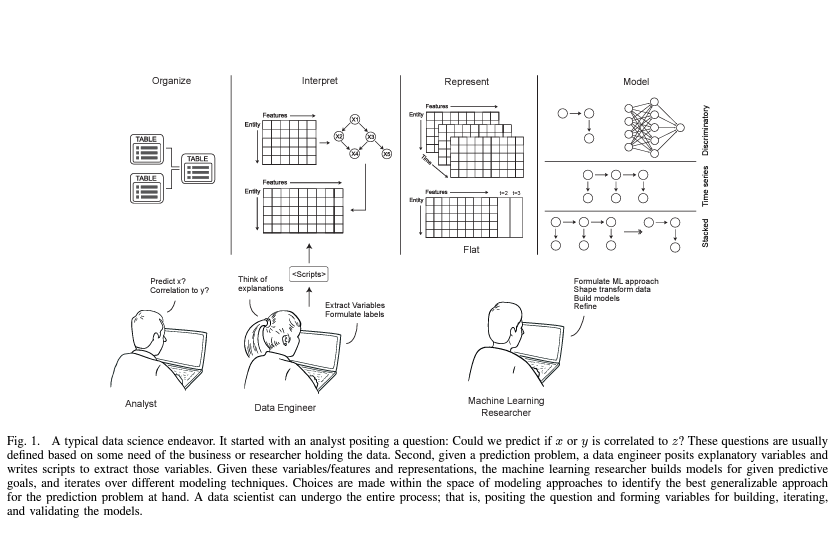

raw data를 features로 변환하는 것은 직관에 의한 것이기 때문에 사람이 가장 많이 관여하는 프로세스의 일부인 경우가 많습니다. 이미지, 텍스트 및 신호와 같은 딥러닝 및 자동화된 process의 발전으로 인해 해당 데이터 유형에 대한 feature engineering의 상당한 자동화가 가능해졌지만, 관계형 및 인간 행동 데이터에 대한 feature engineering은 여전히 반복적이고 사람 직관에 의존하며 시간이 많이 소요됩니다.

이를 위해 Deep Feature Synthesis라는 feature synthesis 알고리즘을 개발했습니다. 기본적으로 자동이지만, 알고리즘은 일반적으로 사람의 직관에 의해 생성되는 features를 담고 있습니다.

features가 합성되면 여러 분류 방법론(svm, neural network 등)에서 선택하고, parameter를 fine-tuning하거나 데이터를 클러스터링하고 클러스터형 모델을 구축할 수 있습니다.

# II. DEEP FEATURE SYNTHESIS
Deep Feature Synthesis는 관계형 데이터 세트에 대한 feature을 자동으로 생성하는 알고리즘입니다. 본질적으로, 알고리즘은 base field에 대한 데이터의 관계를 따른 다음 해당 경로를 따라 mathematical function을 순차적으로 적용하여 최종 feature을 생성합니다. calculations를 순차적으로 쌓음으로써 각각의 새로운 feature를 특정 깊이 $d$를 갖는 것으로 정의할 수 있음을 관찰했습니다. 따라서 알고리즘을 $Deep\, Feature\, Synthesis$라고 부릅니다. 이 섹션에서는 $Deep\, Feature\, Synthesis$의 동기를 설명하고, feature synthesis abstractions를 정의하고, 알고리즘을 제시합니다.

## A. Prototypical Problems and Motivation
전자 상거래 웹 사이트에 대한 가상 데이터 세트를 고려해 보겠습니다. 우리의 목표는 사용 가능한 모든 데이터를 기반으로 고객의 행동을 설명하는 features를 계산하는 것입니다. 이 데이터 세트의 schema는 Figure 2에 나와 있습니다.

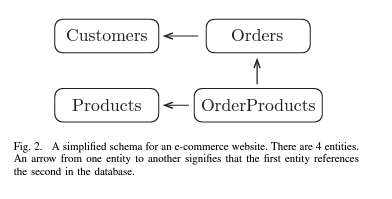

Data Scientist처럼 생각하기 위해 우리는 고객을 설명하는 feature로 번역될 수 있는 질문을 하는 것으로 시작할 수 있습니다. 예를 들어 "이 고객은 얼마나 자주 구매합니까?" 또는 "이 고객의 마지막 구매 이후 얼마나 되었습니까?". 또한 고객과 관련된 entities를 살펴보고 이에 대해 질문할 수 있습니다. 예를 들어 "고객의 총 주문 가격은 얼마입니까?" 또는 "이 고객은 일반적으로 고급스러운 제품이나 경제적인 제품을 구입합니까?" 이러한 질문은 관계를 따르고, 값을 집계하고, 새로운 feature를 계산하여 features로 만들 수 있습니다. 우리의 목표는 이러한 유형의 feature를 생성하거나 proxy quantities로 작용할 수 있는 calculations를 생성할 수 있는 알고리즘을 설계하는 것입니다.

## B. Feature Synthesis Abstractions
Deep Feature Synthesis에 대한 입력은 상호 연결된 entities 및 관련 테이블 집합입니다. entity의 instance에는 $numeric,\, categorical,\, timestamps$ 및 $freetext$ 데이터 유형 중 하나에 속하는 feature이 있습니다.

수식적으로, 주어진 데이터 세트에서 $E^{1 \ldots K}$로 주어진 entities가 있고, 각 entity table은 $1 \ldots J$ features를 가지고 있습니다. 여기서 특정한 entity를 $x_{i, j}^{k}$로 나타내고, 이는 $k^{th}$ entity의 $i^{th}$ instance의 feature $j$에 대한 값을 나타냅니다.

다음으로 주어진 entities, 데이터 테이블 및 관계에 대해 entity level과 relational level의 두 가지 다른 레벨에서 적용되는 여러 mathematical funtions를 정의합니다. 아래에 이러한 functions를 나타냅니다. 

이제, 표기상의 편의를 위해 특정 entities를 나타내는 데 사용되는 $k$를 삭제합니다.

첫 번째 feature sets는 entity $k$에만 해당하는 테이블의 features와 값을 고려하여 계산됩니다. 이를 entity features이라고 하며 아래에서 설명합니다.

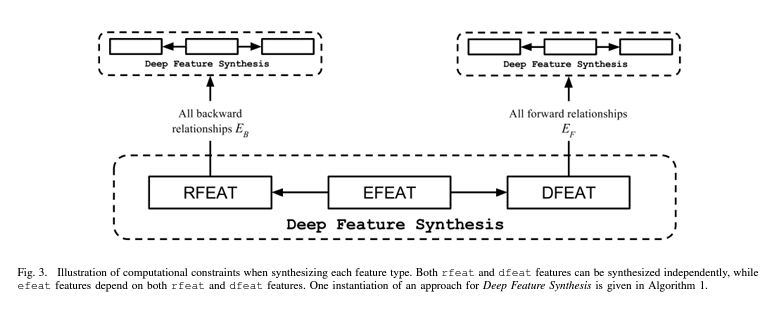

- $Entity features$ (efeat): Entity features은 각 항목 $x_{i,j}$에 대한 값을 계산하여 features을 파생합니다. 이러한 features는 array $x_{:,j}$에 element-wise로 적용된 computation function을 기반으로 할 수 있습니다. 범주형 문자열 데이터 유형을 미리 결정된 고유 숫자 값으로 변환하거나 숫자 값을 반올림하는 것과 같이 entity table의 기존 feature을 다른 유형의 값으로 변환하는 함수가 그 예입니다.

이러한 features에는 다음과 같이 $j^{th}$ feature $x_{:,j}$ 및 $x_{i,j}$에 대한 전체 set of values에 함수를 적용하는 것도 포함됩니다:

$$x_{i, j^{\prime}}=\operatorname{efeat}\left(x_{:, j}, \dot{i}\right)$$

이러한 계산의 예는 cumulative distribution function, (cdf)-based feature입니다. 이 feature를 생성하기 위해 $x_{:,j}$에 대해 density function을 만든 다음, $x_{i,j}$(또는 백분위수)에 대한 누적 density 값을 평가하여 새로운 feature를 형성합니다.

두 번째 set of features는 두 개의 관련 entities $E^l$ 및 $E^k$를 공동으로 분석하여 만들어집니다. 이 두 entities는 $forward$ 또는 $backward$의 두 가지 방법 중 하나로 서로 관련됩니다.

- **Forward**: $forward$ 관계는 entity $E^l$의 인스턴스 $m$과 $E^k$의 다른 entity $i$의 단일 인스턴스 사이에 있습니다. $i$는 $m$에 대한 의존성을 가지고 있기 때문에 이것은 $forward$ 관계로 간주됩니다. e-commerce를 예로 든다면, $Orders$ entity는 $Customers$와 forward 관계를 가지고 있습니다. 즉, $Orders$ table의 각 order는 한명의 고객과 관련이 있습니다.


- **Backward**: $backward$ 관계는 $E^k$의 인스턴스 $i$에서 $k$에 대한 forward 관계를 갖는 $E^l$의 모든 인스턴스 $m=\{1 \ldots M\}$에 대한 관계입니다. 위와 동일한 예에서, $Customers$ entity는 $Orders$와 backward 관계를 갖습니다. 즉, 많은 주문이 동일한 고객을 가리킬 수 있습니다.


- $Direct Features$ (dfeat): Direct features가 $forward$ 관계에 적용됩니다. 여기서 관련 entity $i \in E^{k}$의 특징은 $m \in E^{\prime}$에 대한 특징으로 직접 전달됩니다.


- $Relational features$ (rfeat): Relational features은 $backward$ 관계에 적용됩니다. 이들은 $x_{i, j \mid e^{k}=i}$에 mathematical function을 적용하여 entity $E^k$의 인스턴스 $i$에 통해서 만들어집니다. $x_{i, j \mid e^{k}=i}$는 모든 값을 추출하여 조합된 관련 entity $E^l$의 feature $j$에 대한 collection of values입니다. 여기서 $E^k$의 식별자는 $e^k\, =\, i$입니다. 이 transformation은 다음과 같이 주어집니다:

$$x_{i, j^{\prime}}^{k}=\operatorname{rfeat}\left(x_{i, j \mid e^{k}=i}^{l}\right)$$

$rfeat$ 함수의 몇 가지 예는 min, max 및 count입니다. 다른 $rfeat$ 함수에는 $x_{: j \mid e^{k}=i}^{l}$에 대한 확률 밀도 함수에 적용될 수 있는 함수가 포함됩니다.

## C. Deep Feature Synthesis algorithm
Deep Feature Synthesis 알고리즘을 설명하기 위해 먼저 $E^{1 \ldots K}$로 표시된 $K$ entities의 데이터 세트를 고려합니다. 우리의 목표는 target $E^k$에 대한 $rfeat$, $dfeat$ 및 $efeat$ features를 추출하는 것입니다. 또한, $E^k$가 $FORWARD$ 또는 $BACKWARD$ 관계를 갖는 모든 entities를 알고 있습니다. 이들은 $E_F$ 및 $E_B$ 세트로 표시됩니다.

시작하려면, entity 내에 이미 존재하는 features를 사용하여 $efeat$ features가 생성된다는 것을 알 수 있습니다. 결과에 $efeat$ features를 적용할 수 있도록 먼저 $rfeat$ 및 $dfeat$ features을 합성해야 합니다. $E^k$에 대한 $rfeat$ features를 생성하기 위해, $E_B$에 있는 entities의 features를 사용합니다. 따라서, $E^k$에 대한 $rfeat$ features을 실현하기 전에 $E_B$의 각 entity에 대한 모든 feature types를 생성해야 합니다.

비슷한 방식으로, $E^k$에 $dfeat$ features를 추가합니다. 이러한 features는 $E_F$의 features from entities를 사용하여 구현되므로 먼저 $E_F$의 각 entity에 대한 모든 features를 계산해야 합니다. 마지막으로 모든 $rfeat$ 및 $dfeat$ features가 $E_k$에 추가되어 $efeat$ features를 생성할 수 있습니다. Figure 3은 각 feature type을 올바르게 생성하기 위한 계산 순서를 시각화합니다.

다음으로, target entity와 관련된 entity에 자체적으로 관련된 entities가 있는 시나리오를 고려합니다. 이 경우를 처리하기 위해 위에서 설명한 것과 동일한 시퀀스를 사용하여 features를 재귀적으로 생성할 수 있습니다. recursion는 특정 depth에 도달하거나 관련 entities가 없을 때 종료될 수 있습니다.

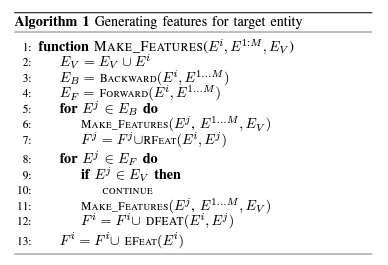

Figure 4는 재귀적으로 생성되는 features의 예를 보여줍니다. 이 예에서는 결국 모든 고객의 평균 주문 사이즈를 계산합니다. 그러나 그 값을 만들기 위해 $Product$ entity부터 시작하여 중간 계산을 수행합니다. 먼저 $ProductOrders$ entity에 제품 가격을 추가하기 위해 $dfeat$ feature를 계산합니다. 다음으로, $Orders$ entity의 주어진 인스턴스와 관련된 $ProductOrders$의 모든 인스턴스에 SUM 함수를 적용하여 $Orders$에 대한 $rfeat$ feature를 계산합니다. 마지막으로 다른 $rfeat$ feature를 계산하여 각 고객의 평균 총 주문 사이즈를 계산합니다.

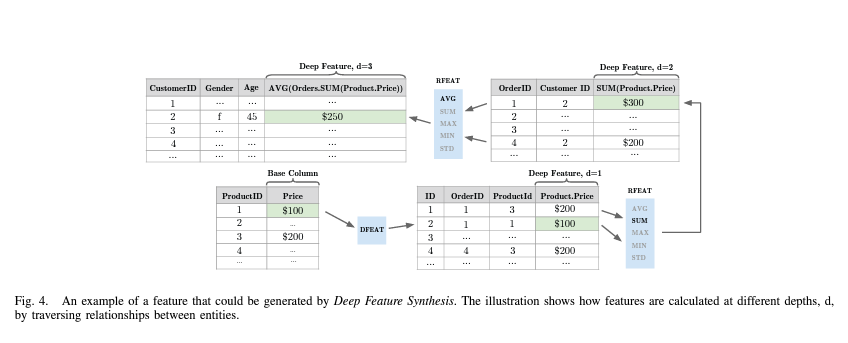

# IX. CONCLUSION

이 논문에서는 Data Science Machine을 제시했습니다: 관계형 데이터로 data science를 수행하기 위한 end-to-end 시스템. 그 핵심에는 machine learning을 위한 features를 자동으로 합성하는 알고리즘인 Deep Feature Synthesis가 있습니다. 서로 다른 도메인의 3개 데이터 세트에서 생성된 features의 표현력을 보여주었습니다. auto tuning process를 구현하여 사람의 관여 없이 전체 경로를 최적화하여 다양한 데이터 세트로 일반화할 수 있었습니다. 전반적으로 시스템은 우리가 테스트한 데이터 세트에 대해서 사람과 비교했을 때, 경쟁력을 보여주었습니다. 우리는 이 성공을 Data science machine이 data science process에서 자신의 역할을 다 한다는 지표로 보고 있습니다.